# Regression
Use the Boston house data for Regression  model 



Implement :



1) Hyper-parameter tuning



2) Model to implement:- linear, KNN-regression,  DT regressor, RF-Regression



3) find the errors and accuracy of the data

##Dhanashri shabade

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random
import os
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston (1).csv')

In [ ]:
data.head()

,crime_rate,proportion_res_land,proportion_business,"river""",NO,avg_rooms,proportion_units,distance,accessibility,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.isna().sum()

crime_rate             0
proportion_res_land    0
proportion_business    0
river"                 0
NO                     0
avg_rooms              0
proportion_units       0
distance               0
accessibility          0
property_tax           0
pupil_teacher_ratio    0
proportion_blacks      0
lower_status           0
value                  0
dtype: int64

In [ ]:
data.dtypes

crime_rate             float64
proportion_res_land    float64
proportion_business    float64
river"                   int64
NO                     float64
avg_rooms              float64
proportion_units       float64
distance               float64
accessibility            int64
property_tax           float64
pupil_teacher_ratio    float64
proportion_blacks      float64
lower_status           float64
value                  float64
dtype: object

In [ ]:
data.describe(include='all')

,crime_rate,proportion_res_land,proportion_business,"river""",NO,avg_rooms,proportion_units,distance,accessibility,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.columns

Index(['crime_rate', 'proportion_res_land', 'proportion_business', 'river"',
       'NO', 'avg_rooms', 'proportion_units', 'distance', 'accessibility',
       'property_tax', 'pupil_teacher_ratio', 'proportion_blacks',
       'lower_status', 'value'],
      dtype='object')

In [ ]:
feature_cols = ['crime_rate', 'proportion_res_land', 'proportion_business', 'river"',
       'NO', 'avg_rooms', 'proportion_units', 'distance', 'accessibility',
       'property_tax', 'pupil_teacher_ratio', 'proportion_blacks',
       'lower_status']

x = data[feature_cols]

y = data['value']

print(type(y))
print(type(x))


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


#Diagonising Linearity

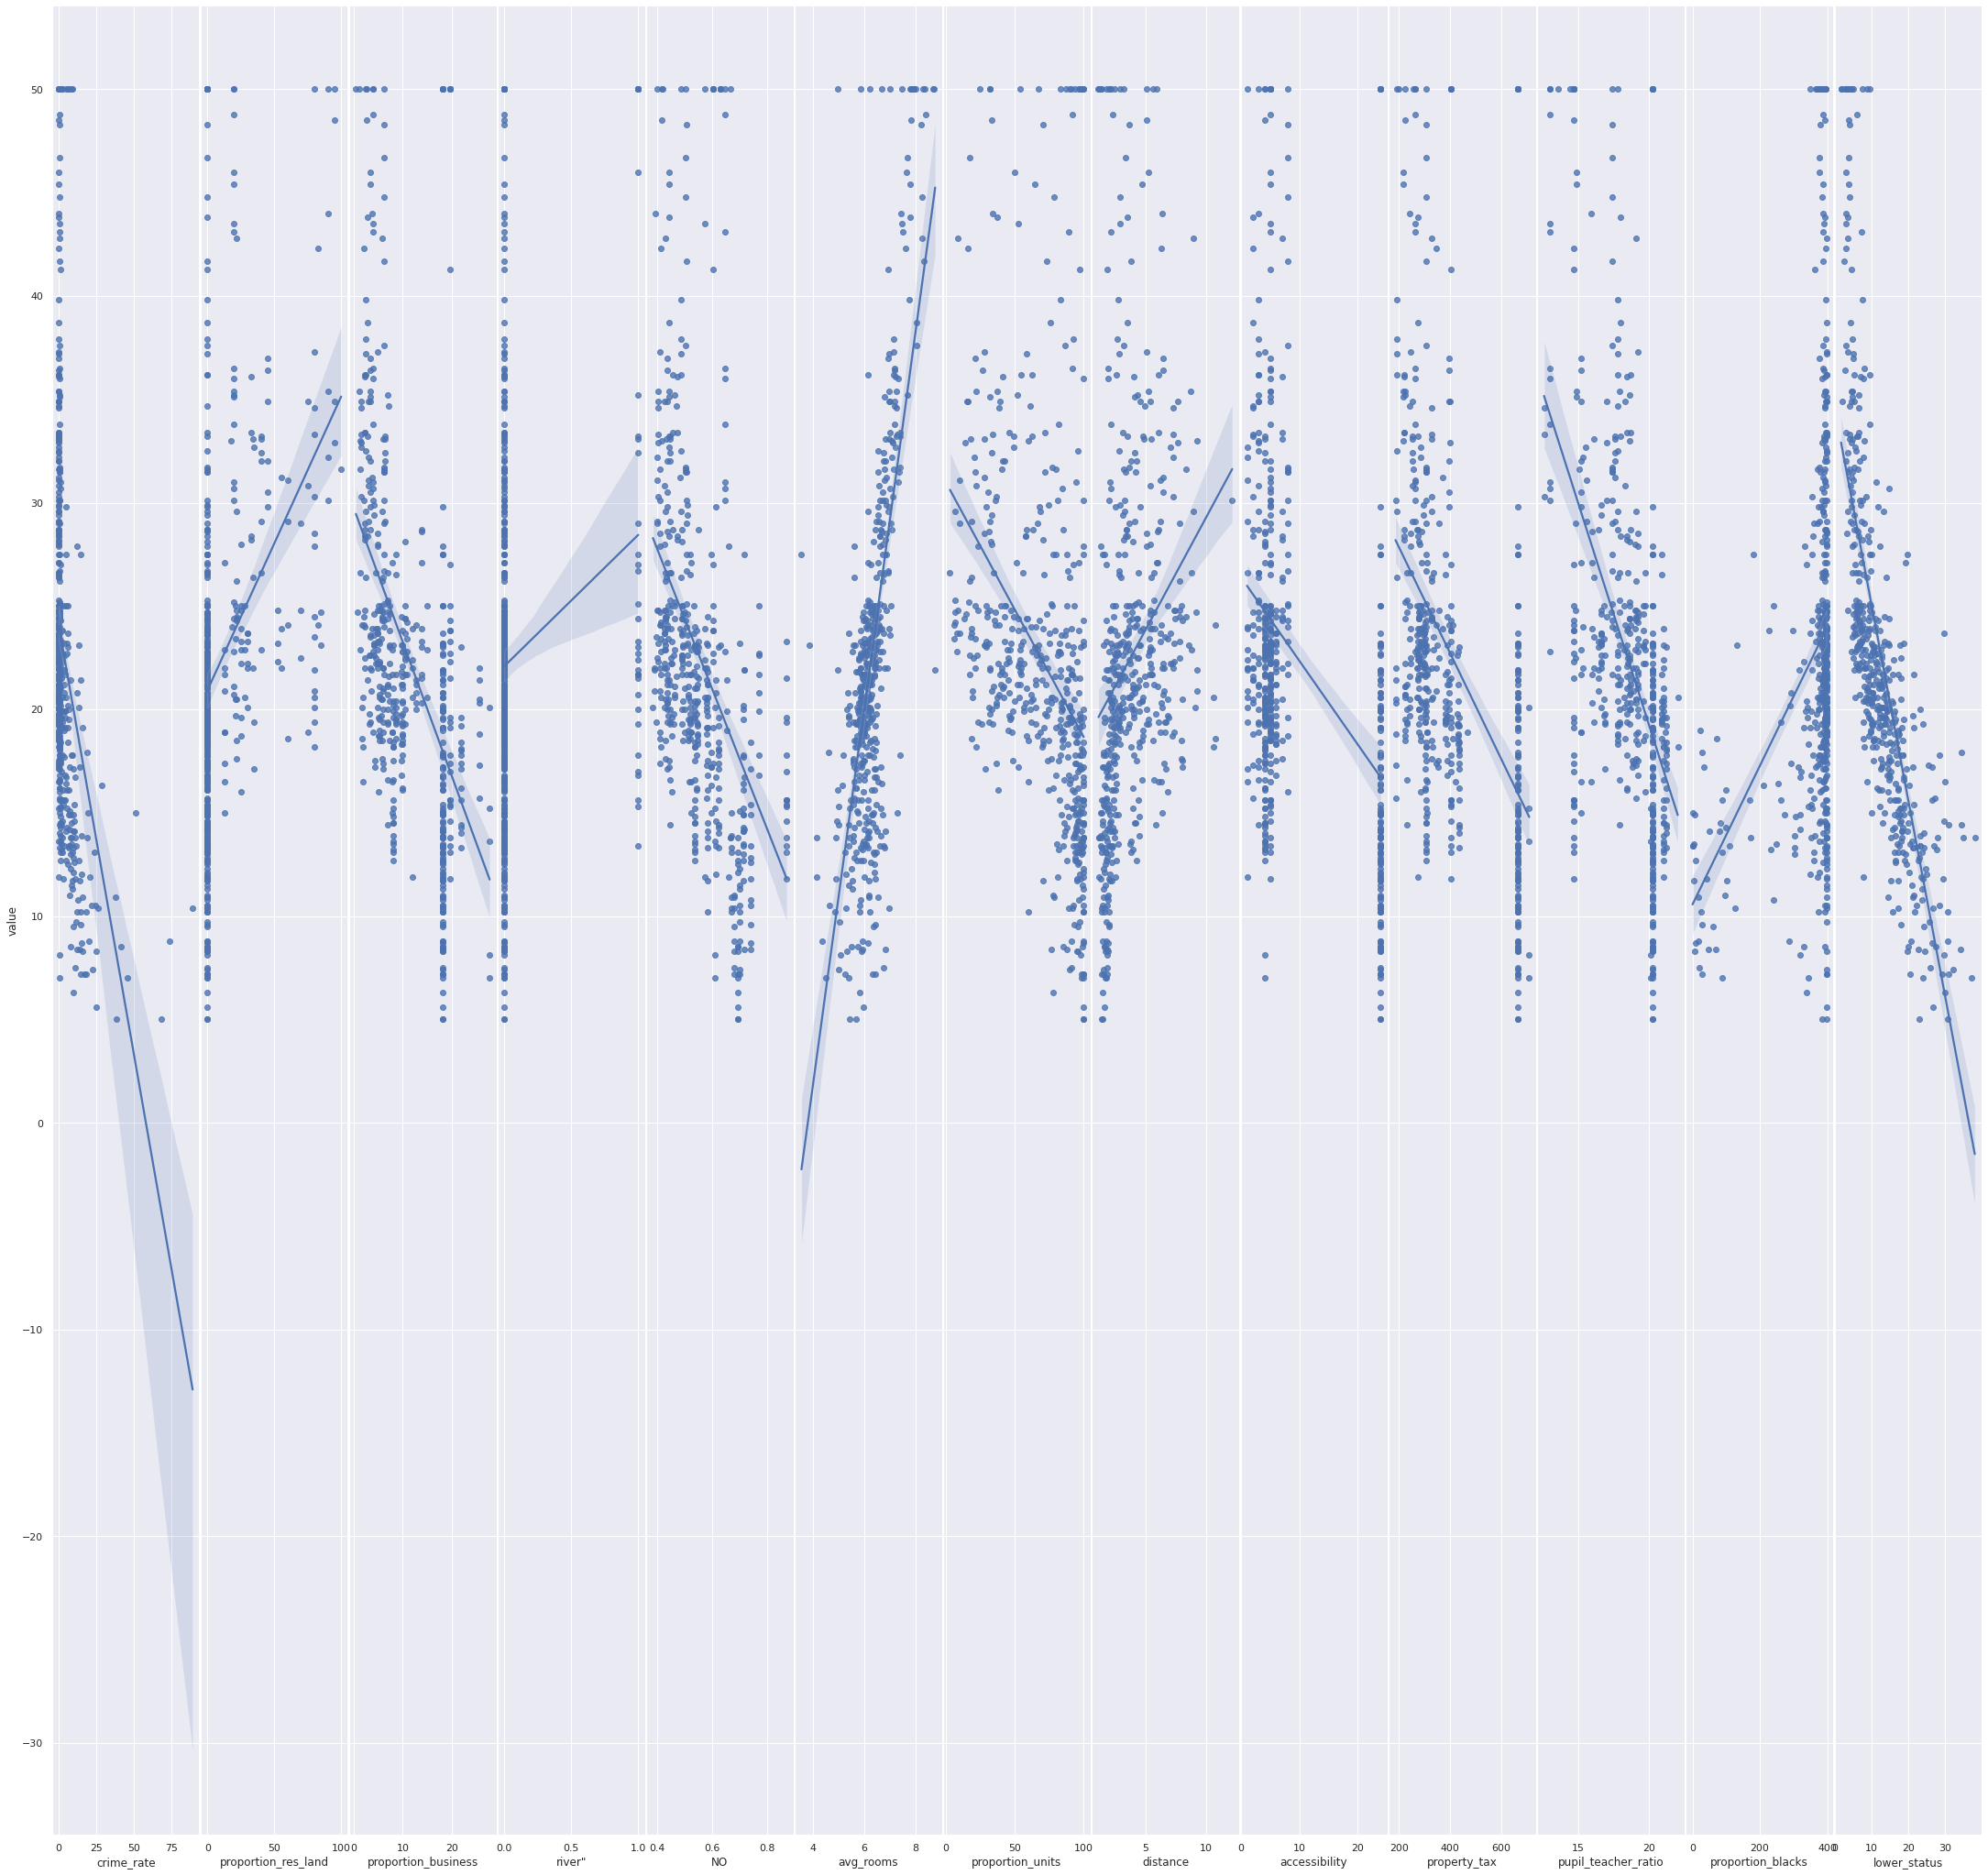

In [ ]:

#plt.rcParams['figure.figsize']=30,10
graph = sns.pairplot(data, x_vars = ['crime_rate', 'proportion_res_land', 'proportion_business', 'river"',
       'NO', 'avg_rooms', 'proportion_units', 'distance', 'accessibility',
       'property_tax', 'pupil_teacher_ratio', 'proportion_blacks',
       'lower_status'], y_vars = "value", kind = "reg", height = 12)
graph.fig.set_size_inches(30,30)

## We can clearly observe a linear relationship between independent and dependent variables

#Diagnosing Multicolinearity

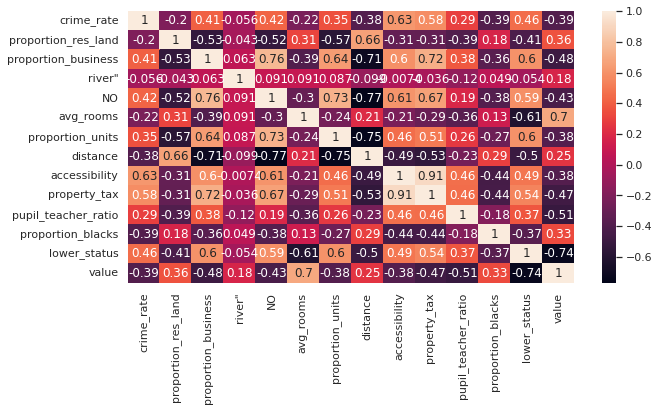

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(x):
  thresh = 5.0 # avariable to drop vif more than 5
  output = pd.DataFrame()
  k = x.shape[1]
  dropped_columns = []

  vif = [variance_inflation_factor(x.values,j) for j in range(x.shape[1])]
  print(vif)

  # the below for loop is to delete column having vif more than 5

  for i in range(1,k):
    print(vif)
    a = np.argmax(vif) #index of maximum argument

    print("==>Iteration no",i)
    print("Max VIF is for variable no.:",a)

    if vif[a] <= thresh :
         break
    if i==1 :
      print(i)
      output = x.drop(x.columns[a], axis = 1)
      vif = [variance_inflation_factor(output.values,j)for j in range (output.shape[1])]
      print(output.columns, x.columns)
      dropped_columns.append(x.columns[a])
      print(dropped_columns)
      


    elif i>1 :
      print(i)
      dropped_columns.append(output.columns[a])
      output.drop(output.columns[a],axis = 1, inplace = True) 
      vif = [variance_inflation_factor(output.values,j) for  j in range (output.shape[1])]
      print(output.columns)
      #dropped_columns.append(output.columns[a])
      #print(dropped_columns)


  return(output, dropped_columns)  

In [ ]:
output, dropped_columns = calculate_vif(x)

[2.1003728199615233, 2.8440132669462628, 14.485757706539308, 1.1529518589418777, 73.89494652814788, 77.94828304638538, 21.38685048994314, 14.6996523837492, 15.167724857920897, 61.227274009649456, 85.02954731061801, 20.104942636229136, 11.102024772203526]
[2.1003728199615233, 2.8440132669462628, 14.485757706539308, 1.1529518589418777, 73.89494652814788, 77.94828304638538, 21.38685048994314, 14.6996523837492, 15.167724857920897, 61.227274009649456, 85.02954731061801, 20.104942636229136, 11.102024772203526]
==>Iteration no 1
Max VIF is for variable no.: 10
1
Index(['crime_rate', 'proportion_res_land', 'proportion_business', 'river"',
       'NO', 'avg_rooms', 'proportion_units', 'distance', 'accessibility',
       'property_tax', 'proportion_blacks', 'lower_status'],
      dtype='object') Index(['crime_rate', 'proportion_res_land', 'proportion_business', 'river"',
       'NO', 'avg_rooms', 'proportion_units', 'distance', 'accessibility',
       'property_tax', 'pupil_teacher_ratio', 'prop

In [ ]:
dropped_columns

['pupil_teacher_ratio',
 'NO',
 'property_tax',
 'avg_rooms',
 'proportion_units',
 'proportion_blacks',
 'proportion_business']

In [ ]:
output

,crime_rate,proportion_res_land,"river""",distance,accessibility,lower_status
0,0.00632,18.0,0,4.0900,1,4.98
1,0.02731,0.0,0,4.9671,2,9.14
2,0.02729,0.0,0,4.9671,2,4.03
3,0.03237,0.0,0,6.0622,3,2.94
4,0.06905,0.0,0,6.0622,3,5.33
...,...,...,...,...,...,...
501,0.06263,0.0,0,2.4786,1,9.67
502,0.04527,0.0,0,2.2875,1,9.08
503,0.06076,0.0,0,2.1675,1,5.64
504,0.10959,0.0,0,2.3889,1,6.48


# so with help of VIf we have dropped the columns having Multicolinearity i.e columns having VIf more than 5

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(output,y, test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
 X_train= scale.fit_transform(X_train)

In [ ]:
X_train.shape

(379, 6)

In [ ]:
y_train.shape

(379,)

In [ ]:
X_test= scale.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
linreg.coef_

array([-0.62866276,  2.46523183,  0.94344289, -3.22088007, -1.03546835,
       -6.77244672])

In [ ]:
linreg.intercept_

22.608707124010557

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
y_pred

array([24.72611636, 25.80354189, 28.27882682, 14.15414878, 20.20859884,
       24.7218018 , 21.2778705 , 23.39061511, 23.68964589, 25.34534879,
        9.48554175, 13.87835534, 16.86116323,  6.53577643, 38.26196734,
       30.28956786, 21.45240943, 33.10608568, 29.7047663 , 25.23045304,
       25.76869966, 24.3701812 , 23.00703915, 30.66722639, 22.31138385,
       21.37309839, 20.40689121, 22.0211792 , 30.55494837, 19.40088979,
       16.18285535, 18.73754365, 19.61939912, 21.10382429, 26.95807781,
       24.0427786 ,  7.72051723, 30.35076112, 16.8640933 , 10.70599419,
       23.11395206, 18.60058009, 22.06562396, 15.84605953, 22.23447521,
       23.65449442, 15.01597711, 26.31462321,  9.68975775, 26.39352806,
       26.25308917, 18.53821435, 22.5300169 , 24.51915996, 19.68626963,
       17.65636999, 21.72680442, 15.51880149, 21.68784029, 21.22878988,
       22.06187521, 21.48725719, 29.79834709, 30.42202183, 18.03932074,
       32.8822896 , 16.54622626, 11.80458224, 15.3000197 , 23.35

# Normality of residuals

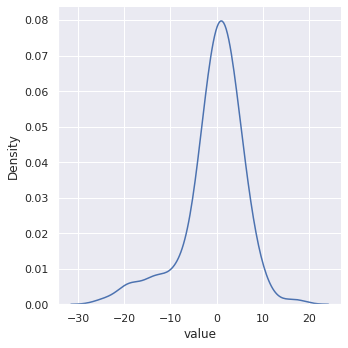

In [ ]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

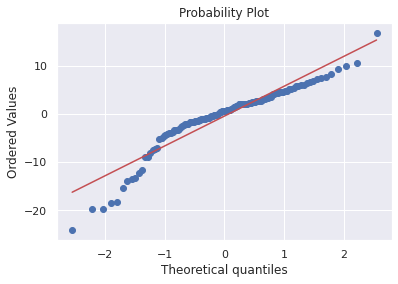

In [ ]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(y_pred-y_test, plot=ax, fit=True)

plt.show()


##from above two plots We can observe that residuals(Errors) are preety much normaly distributed 

#Detecting Homoscdasticity

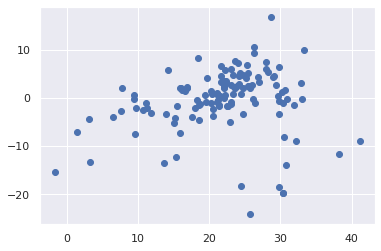

In [ ]:
plt.scatter(y_pred,y_pred-y_test)

#Checking Autocorrlation of Residuals

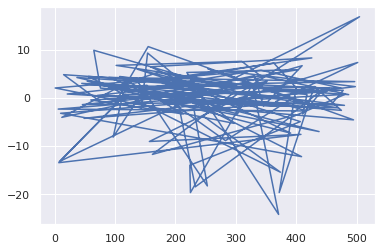

In [ ]:
plt.plot(y_pred-y_test)

##From last two plots we can observe that 2 assumptions of Linear regression that are Homoscdasticity and autocorelation of residuals are not satisfied.
##**so we can't fit Linear regression Model on this data**

#KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
list = []
list2 =[]
for k in range(1,10):
  KNN = KNeighborsRegressor(n_neighbors=k)
  KNN.fit(X_train,y_train)
  y_pred1 = KNN.predict(X_test)
  MSE =metrics.mean_squared_error(y_test,y_pred1)
  list.append(MSE)
  list2.append(metrics.r2_score(y_test,y_pred1))
  #list2.append(r2_score)

In [ ]:
list2

[0.5719751038499414,
 0.6131438359803911,
 0.6215228888218947,
 0.5972270730757749,
 0.5290716675582803,
 0.495719113044223,
 0.5026476636253052,
 0.5059209714983286,
 0.4992131076009789]

In [ ]:
list

[34.969212598425194,
 31.605767716535432,
 30.921207349081357,
 32.90615157480315,
 38.47438110236219,
 41.19925196850392,
 40.633196207616905,
 40.365770177165345,
 40.91379605327112]

## we can observe low r2 score and bit high value of MSE so let's try doing hyperparameter tunning

## Hyperparameter-Tunning with KNN Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
KNN = KNeighborsRegressor()

In [ ]:
n_neighbours = [1,2,3,4,5]
#weights = ['uniform', 'distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
leaf_size = [15,20,25,30,35]
#metric = ['minkowski','manhattan_distance']


In [ ]:
hyperparameters = dict(n_neighbors=n_neighbours,algorithm=algorithm,leaf_size=leaf_size)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
grid = GridSearchCV(KNN,hyperparameters, cv=6)

In [ ]:
grid.get_params()

{'cv': 6,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1, 2, 3, 4, 5],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'leaf_size': [15, 20, 25, 30, 35]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=5,p=2,algorithm='auto',metric='minkowski',leaf_size=30)

In [ ]:
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred_new=KNN.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
MSE=metrics.mean_squared_error(y_test,y_pred_new)

In [ ]:
np.sqrt(MSE)

6.202772049846922

In [ ]:
r2_score(y_test,y_pred_new)

0.5290716675582803

### Even with hyperparameter tunning we can't get high accuaracy in the model so Let's try for Decision Tree regression

#Decision Tree Regressorion

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2 = reg.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred2)

31.835039370078743

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred2))

5.642254812579696

In [ ]:
metrics.r2_score(y_test,y_pred2)

0.6103375395726062

###we can observe a very low error for this model so decision tree would be the best fit model for given

#Hyperparameter tunning with Decision Tree Regressor


In [ ]:
DecisionTreeRegressor??

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
new_model=GridSearchCV(reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
new_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'n_jobs': None,
 'param_grid': {'splitter': ['best', 'random'],
  'max_depth': [1, 3, 5, 7, 9, 11, 12],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'max_features': ['auto', 'log2', 'sqrt', None],
  'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0}

In [ ]:
model = new_model.fit(X_train,y_train)

In [ ]:
model.best_score_

-22.284934969636048

In [ ]:
model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
reg = DecisionTreeRegressor(criterion='squared_error',
 max_depth= 11,
 max_features= 'auto',
 max_leaf_nodes= 30,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 3,
 min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 random_state= None)

In [ ]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=3)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mean_squared_error(y_pred,y_test)

32.04354434852673

In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

5.4620691689413094

In [ ]:
r2_score(y_pred,y_test)

0.46370667818228906

##we can say that there is no significance difference in model fitting before and after the hyperparameter tunning.

#RandomForestRegressor

In [ ]:
import sklearn

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(n_estimators=5,random_state=1)

In [ ]:
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=1)

In [ ]:
X_train.shape

(379, 6)

In [ ]:
y_train.shape

(379,)

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
mean_squared_error(y_pred,y_test)

32.04354434852673

In [ ]:
r2_score(y_pred,y_test)

0.46370667818228906

In [ ]:
parameters = {'n_estimators': [5,10,20,25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}



In [ ]:
grid_CV = GridSearchCV(RF, parameters, cv=8, scoring='neg_mean_squared_error')
grid_CV.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
192 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py",

GridSearchCV(cv=8,
             estimator=RandomForestRegressor(n_estimators=5, random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None], 'max_features': [5, 10],
                         'n_estimators': [5, 10, 20, 25]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_CV.cv_results_

{'mean_fit_time': array([0.00700924, 0.01191813, 0.02256504, 0.0294061 , 0.0023059 ,
        0.00324532, 0.00556263, 0.00659519, 0.00647601, 0.01204282,
        0.02547801, 0.02872255, 0.00222158, 0.00477827, 0.0063042 ,
        0.0072608 , 0.00714439, 0.01350376, 0.02383485, 0.02920169,
        0.00245366, 0.00377411, 0.00584126, 0.0068368 , 0.00682822,
        0.01171836, 0.02305844, 0.02883822, 0.00217971, 0.00327751,
        0.00530642, 0.00662926, 0.00650385, 0.01313883, 0.02501169,
        0.02932888, 0.00213215, 0.00310943, 0.00630644, 0.00651091,
        0.00720754, 0.01252362, 0.024333  , 0.0315651 , 0.0020144 ,
        0.00373811, 0.00562957, 0.00684232]),
 'std_fit_time': array([1.60571875e-03, 8.67536509e-04, 8.55836865e-04, 3.24498005e-03,
        1.69841527e-04, 4.21459107e-05, 1.44775348e-04, 1.42073007e-04,
        8.70061321e-04, 5.16334637e-04, 5.31948728e-03, 1.39882501e-03,
        1.36306427e-04, 8.72582384e-04, 4.12108165e-04, 1.86113687e-04,
        6.53789682e-0

In [ ]:
grid_CV.best_estimator_

RandomForestRegressor(max_depth=50, max_features=5, n_estimators=20,
                      random_state=1)

In [ ]:
RF = RandomForestRegressor(max_depth=50, max_features=5, n_estimators=20,
                      random_state=1)

In [ ]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, max_features=5, n_estimators=20,
                      random_state=1)

In [ ]:
y_pred=RF.predict(X_test)

In [ ]:
mean_squared_error(y_pred,y_test)

29.834199606299205

In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

5.4620691689413094

In [ ]:
r2_score(y_pred,y_test)

0.48492812178351263

### For random forest we are getting low error value but r2_score is very low as compared to decision tree model

## So Now after implmenting above all models on given dataset we can conclude that Decision Tree Regressor would be the best fit model considering low RMSE value and better r2_score.